In [1]:
import subprocess
import pandas as pd
from matplotlib.widgets import Cursor
import matplotlib.pyplot as plt
import numpy as np


## Helper Functions

In [2]:
def get_data(source_dir, source_file, dest_dir):
    keyFile = '/Users/shreyashbhattarai/Downloads/shreyash_soca_privatekey.pem'
    server_host = 'shreyash@10.100.12.233'
    server_host = 'shreyash@10.100.13.87'
    source_dir = source_dir
    source_file = source_file
    dest_dir = dest_dir
    dest_file = source_file

    command = f'scp -i {keyFile} {server_host}:{source_dir}{source_file} {dest_dir}{dest_file}'
    subprocess.run(command, shell=True)

    df = pd.read_csv(f'{dest_dir}{dest_file}', delimiter='  ', skiprows=2)

    return df

## MMI 1x2 & 2x2

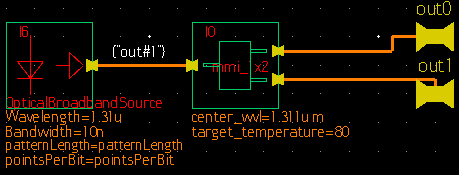

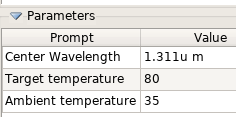

In [44]:
source_file = 'sim_mmi_1x2_2x2.txt'

source_dir = '/lm/users/shreyash/updraft/synopsys_custom/'
dest_dir = '/Users/shreyashbhattarai/Documents/python_scratch/updraft/data/'
df = get_data(source_dir, source_file, dest_dir)

new_columns = ['Wavelength', 'mmi_2x2_out0', 'mmi_2x2_out1', 'mmi_1x2_out0', 'mmi_1x2_out1']
df.columns = new_columns
df.iloc[:, 1:] = 10*np.log10(df.iloc[:, 1:])
df


/var/folders/2c/lqjqwd414xqbs9gkcf9b4ygc0000gn/T/ipykernel_10321/2273798065.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(f'{dest_dir}{dest_file}', delimiter='  ', skiprows=2)


,Wavelength,mmi_2x2_out0,mmi_2x2_out1,mmi_1x2_out0,mmi_1x2_out1
0,0.000001,-3.238974,-3.280583,-3.078143,-3.083175
1,0.000001,-3.238755,-3.280334,-3.078107,-3.083139
2,0.000001,-3.238526,-3.280093,-3.078081,-3.083113
3,0.000001,-3.238306,-3.279853,-3.078055,-3.083086
4,0.000001,-3.238077,-3.279613,-3.078028,-3.083060
...,...,...,...,...,...
4090,0.000001,-3.349906,-3.393052,-3.091733,-3.094832
4091,0.000001,-3.350169,-3.393318,-3.091769,-3.094867
4092,0.000001,-3.350423,-3.393593,-3.091813,-3.094903
4093,0.000001,-3.350686,-3.393859,-3.091848,-3.094938


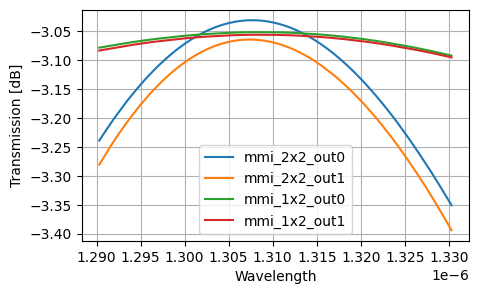

In [46]:
df.plot(x='Wavelength', kind='line', figsize=(5, 3))
plt.legend(df.columns[1:])
plt.grid()
plt.xlabel('Wavelength')
plt.ylabel('Transmission [dB]')
#plt.xlim(1305e-9, 1315e-9)
plt.show()


## BMMI

In [47]:
source_file = 'sim_bmmi.txt'

source_dir = '/lm/users/shreyash/updraft/synopsys_custom/'
dest_dir = '/Users/shreyashbhattarai/Documents/python_scratch/updraft/data/'
df = get_data(source_dir, source_file, dest_dir)

new_columns = ['Wavelength', 'out_0', 'out_1']
df.columns = new_columns
df.iloc[:, 1:] = 10*np.log10(df.iloc[:, 1:])
df


/var/folders/2c/lqjqwd414xqbs9gkcf9b4ygc0000gn/T/ipykernel_10321/2273798065.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(f'{dest_dir}{dest_file}', delimiter='  ', skiprows=2)


,Wavelength,out_0,out_1
0,0.000001,-0.815503,-12.767316
1,0.000001,-0.814963,-12.766815
2,0.000001,-0.814429,-12.766322
3,0.000001,-0.813889,-12.765829
4,0.000001,-0.813349,-12.765328
...,...,...,...
4090,0.000001,-0.944621,-12.738297
4091,0.000001,-0.945080,-12.738729
4092,0.000001,-0.945533,-12.739162
4093,0.000001,-0.945992,-12.739594


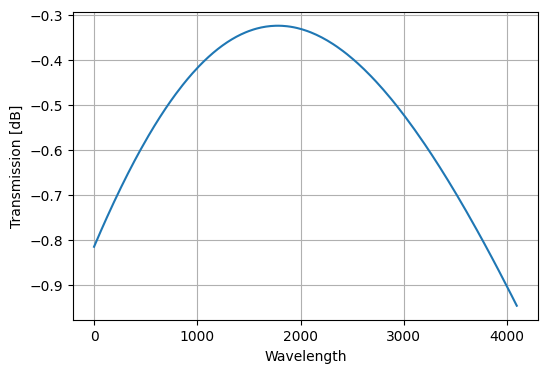

In [50]:
plt.figure(figsize=(6, 4))
plt.plot(df['out_0'])
plt.grid()
plt.xlabel('Wavelength')
plt.ylabel('Transmission [dB]')
#plt.xlim(1305e-9, 1315e-9)
plt.show()


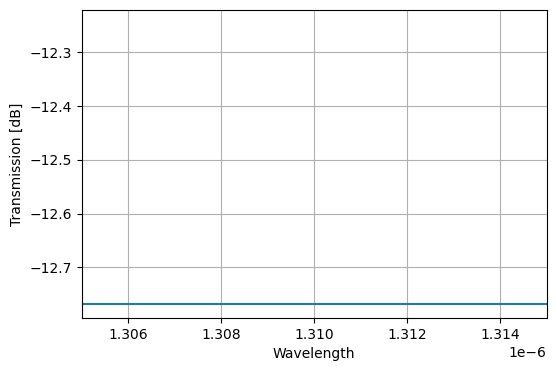

In [49]:
plt.figure(figsize=(6, 4))
plt.plot(df['out_1'])
plt.grid()
plt.xlabel('Wavelength')
plt.ylabel('Transmission [dB]')
plt.xlim(1305e-9, 1315e-9)
plt.show()


## TRL

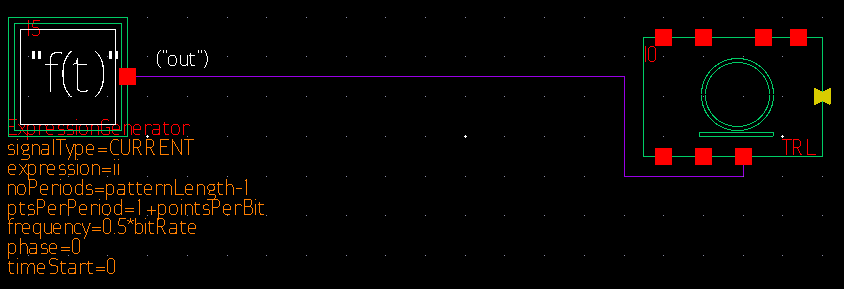

In [39]:
source_file = 'trl.txt'

source_dir = '/lm/users/shreyash/updraft/synopsys_custom/'
dest_dir = '/Users/shreyashbhattarai/Documents/python_scratch/updraft/data/'
df = get_data(source_dir, source_file, dest_dir)

#new_columns = ['Current', 'P_out T=40C', 'out_1']
# Convert to mA
df.iloc[:, 0:] = 1e3*df.iloc[:, 0:]

file_path = f'data/{source_file}'
with open(file_path, 'r') as file:
    lines = file.readlines()
    new_columns = lines[1].split()
df.columns = new_columns
df = df.rename(columns={'XVAL': 'I [A]'})
df



/var/folders/2c/lqjqwd414xqbs9gkcf9b4ygc0000gn/T/ipykernel_10321/2273798065.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(f'{dest_dir}{dest_file}', delimiter='  ', skiprows=2)


,I [A],"oc_opt_pow(lsrout,/I0/out0):tt=40:wvl=1.31u","oc_opt_pow(lsrout,/I0/out0):tt=60:wvl=1.31u","oc_opt_pow(lsrout,/I0/out0):tt=80:wvl=1.31u"
0,10.0,0.2202,0.01076,0.00000
1,20.0,0.3823,0.07433,0.00000
2,30.0,2.5720,1.10900,0.03054
3,40.0,5.6660,3.58900,0.73810
4,50.0,8.6830,6.38300,3.15500
5,60.0,11.6100,9.16900,5.69700
6,70.0,14.4300,11.85000,8.15500
7,80.0,17.1400,14.37000,10.52000
8,90.0,19.7400,16.72000,12.71000
9,100.0,22.2300,18.91000,14.81000


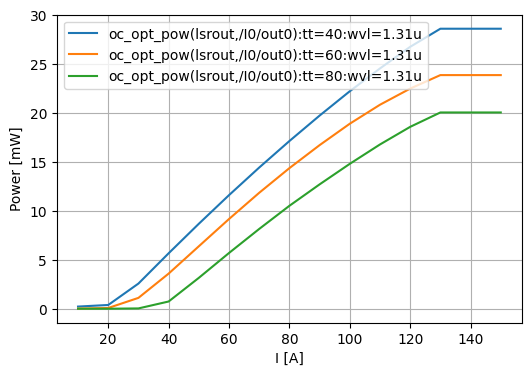

In [40]:
df.plot(x='I [A]', kind='line', figsize=(6, 4))
plt.legend(df.columns[1:], loc='best')
plt.grid()
#plt.xlabel('Wavelength')
plt.ylabel('Power [mW]')
plt.show()


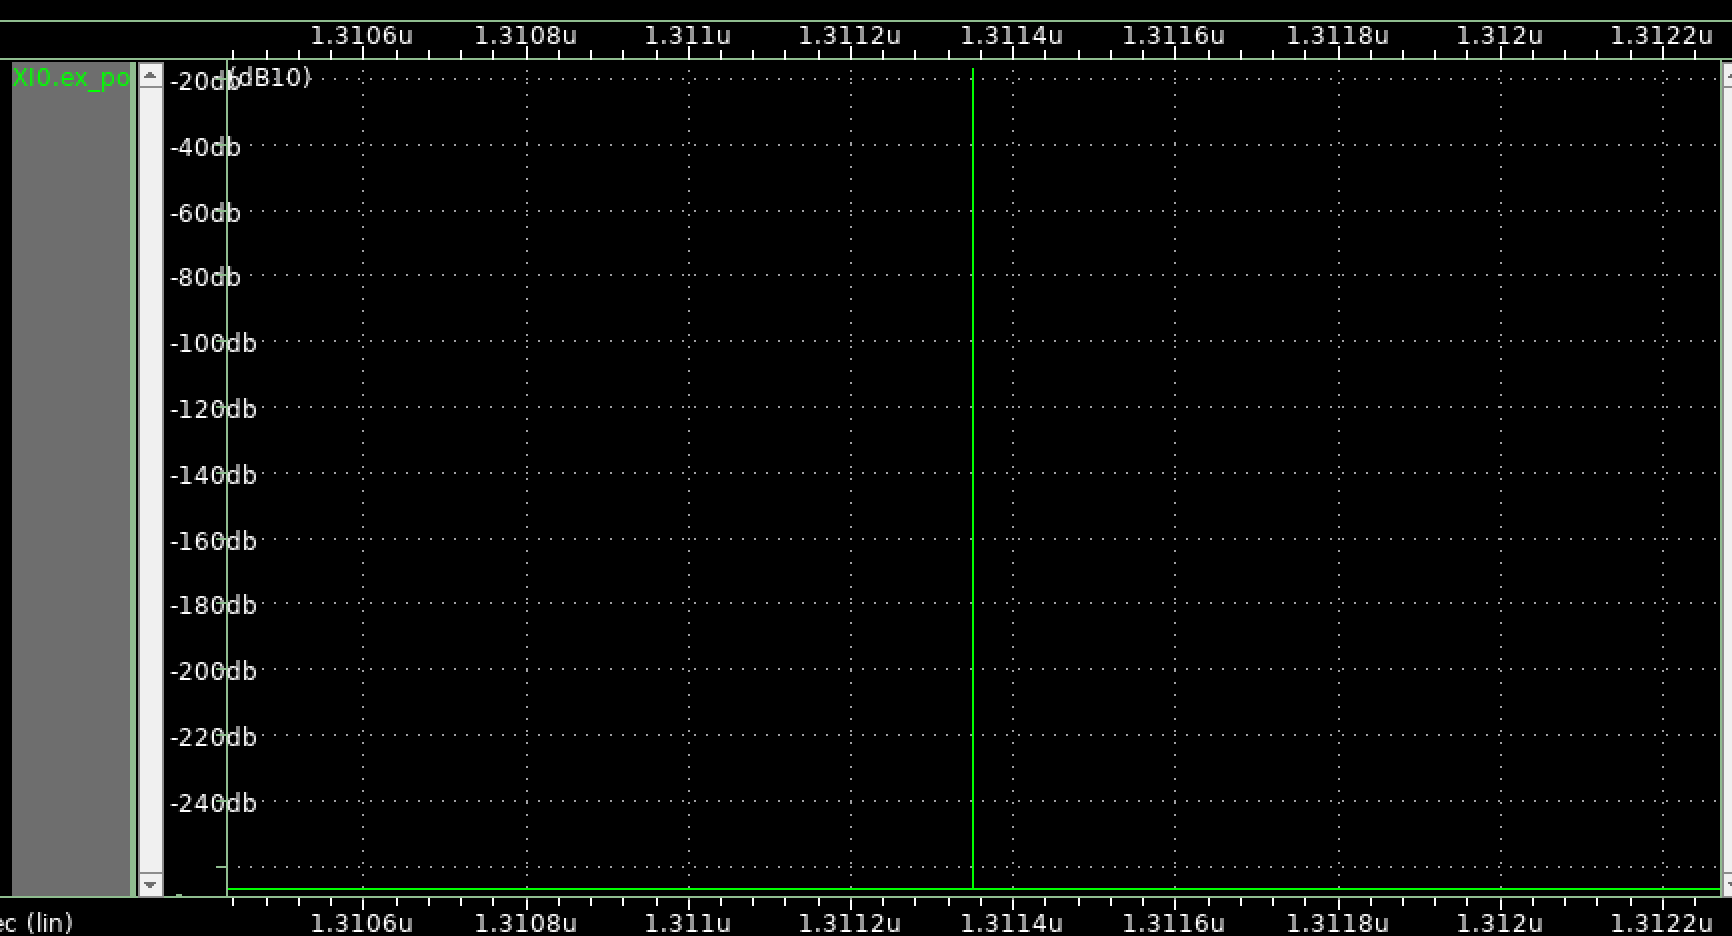

In [43]:
source_file = 'trl_spectrum.txt'

source_dir = '/lm/users/shreyash/updraft/synopsys_custom/'
dest_dir = '/Users/shreyashbhattarai/Documents/python_scratch/updraft/data/'
df = get_data(source_dir, source_file, dest_dir)

#new_columns = ['Current', 'P_out T=40C', 'out_1']
# Convert to mA
df.iloc[:, 0:] = 1e3*df.iloc[:, 0:]

file_path = f'data/{source_file}'
with open(file_path, 'r') as file:
    lines = file.readlines()
    new_columns = lines[1].split()
df.columns = new_columns
df = df.rename(columns={'XVAL': 'Wavelength'})
df



/var/folders/2c/lqjqwd414xqbs9gkcf9b4ygc0000gn/T/ipykernel_10321/2273798065.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(f'{dest_dir}{dest_file}', delimiter='  ', skiprows=2)


TypeError: can't multiply sequence by non-int of type 'float'